Pipeline Burst thickness calculation (ASME B31.8, ASME B31.4).



for D/t >= 30:

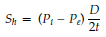     

for D/t < 30:

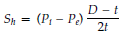     


maximum thickness= 15.144 mm
minimum thickness= 15.0005 mm
    Water depth[m]  Thickness[mm]
0          1600.00          15.14
1          1601.01          15.14
2          1602.02          15.14
3          1603.03          15.14
4          1604.04          15.14
5          1605.05          15.14
6          1606.06          15.14
7          1607.07          15.13
8          1608.08          15.13
9          1609.09          15.13
10         1610.10          15.13
11         1611.11          15.13
12         1612.12          15.13
13         1613.13          15.13
14         1614.14          15.12
15         1615.15          15.12
16         1616.16          15.12
17         1617.17          15.12
18         1618.18          15.12
19         1619.19          15.12
20         1620.20          15.12
21         1621.21          15.11
22         1622.22          15.11
23         1623.23          15.11
24         1624.24          15.11
25         1625.25          15.11
26         1626.26     

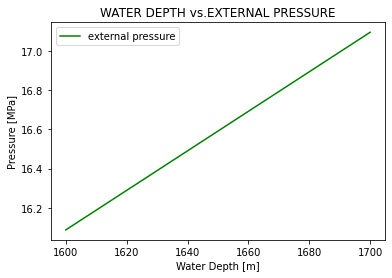

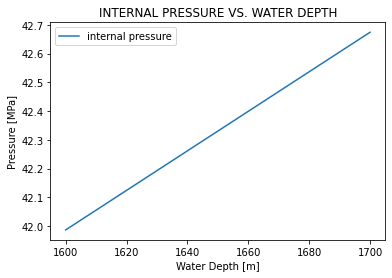

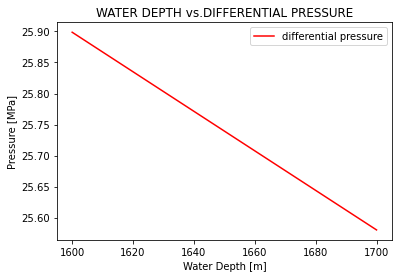

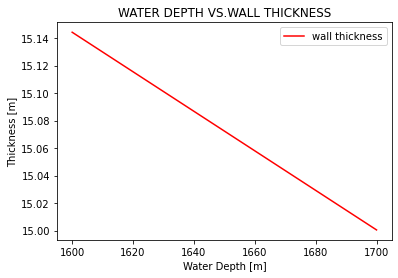

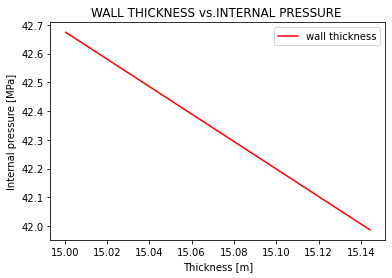

In [1]:
from pipedata import*     #imports all input data from the module pipedata.py
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Range of water depth  
WD = np.linspace(WD_min,WD_max,100)

# Derated yield stress 
def fy(Td):
    if Td < 121:
        fy = 1
    elif 121 < Td <= 149:
        fy = (Td -121)*(-0.033/28) + 1
    elif 149 < Td <= 177:
        fy = (Td -121)*(-0.033/28) + 0.967
    elif 177 < Td <= 204:
        fy = (Td -177)*(-0.033/27) + 0.933
    else:
        fy = (Td -204)*(-0.033/28) + 0.9
    return fy*SMYS

# Allowable hoop stress     
def Sh():
    return fy(Td) * f_hs   

# Internal pressure, Pa
def Pi(WD):
    return (Pd + rho_cont*g*WD)

# External pressure, Pa   
def Pe(WD):
    return (rho_sw*g*WD)

# Differential pressure , Pa     
def P_diff(WD):
    return Pi(WD) - Pe(WD)
    
# BURST thickness calculation
def thick(WD):
    t = sp.symbols('t')
    eq1 = ((P_diff(WD) * (D-t))/(2*t))
    eq2 = ((P_diff(WD) * D)/(2*t))
               
    sol1 = sp.solveset(sp.Eq(eq1,Sh()),t).args[0]
    sol2 = sp.solveset(sp.Eq(eq2,Sh()),t).args[0]
        
    eq1 =  sp.lambdify(t,sol1,'numpy')
    eq2 =  sp.lambdify(t,sol2,'numpy')
        
    if (D/eq1(t))<30:
        t = eq1(t) + CA
    else:
        t = eq2(t) + CA
                   
    return t*1000                        # thickness in mm

# thickness based on range of water depth 
tb = list(round(thick(WD),6) for WD in np.linspace(WD_min,WD_max,100))  
t_max = max(tb)
t_min = min(tb)
print('maximum thickness=',round(t_max,3),'mm')
print('minimum thickness=',round(t_min,4),'mm')

#Write result to file
def write_to_file():
    pd.set_option('display.max_rows', 200) # increase no.of rows to a maximum of 200 
    data = pd.DataFrame({'Water depth[m]':np.round(WD,2),'Thickness[mm]':np.round(tb,2)})
    print(data)
    file = open('Burst_result.txt','w')
    file.write(str(data))
    return file.close()
write_to_file()


# Plots
def plots():
    # plot water depth and external pressure 
    plt.plot(WD,Pe(WD)/10**6,label='external pressure',color='green')
    plt.title('WATER DEPTH vs.EXTERNAL PRESSURE')
    plt.xlabel('Water Depth [m]')
    plt.ylabel('Pressure [MPa]')
    plt.savefig('fig1.Water depth vs.External pressure.png',dpi=100)
    plt.legend()
    plt.show()
  
    # plot water depth and internal pressure
    plt.plot(WD,Pi(WD)/10**6,label='internal pressure')
    plt.title('INTERNAL PRESSURE VS. WATER DEPTH')
    plt.xlabel('Water Depth [m]')
    plt.ylabel('Pressure [MPa]')
    plt.savefig('fig2.Water depth vs.Internal pressure.png',dpi=100)
    plt.legend()
    plt.show()
    
    # plot water depth and differential pressure 
    plt.plot(WD,P_diff(WD)/10**6,label='differential pressure',color='r')
    plt.title('WATER DEPTH vs.DIFFERENTIAL PRESSURE')
    plt.xlabel('Water Depth [m]')
    plt.ylabel('Pressure [MPa]')
    plt.savefig('fig3.Water depth vs.Differential pressure.png',dpi=100)
    plt.legend()
    plt.show()
    
    # plot Water depth and thickness 
    plt.plot(WD,tb,label='wall thickness',color='r')
    plt.title('WATER DEPTH VS.WALL THICKNESS')
    plt.xlabel('Water Depth [m]')
    plt.ylabel('Thickness [m]')
    plt.savefig('fig4. Water depth vs. Burst thickness.png',dpi=100)
    plt.legend()
    plt.show()
    
    # plot thickness and internal pressure 
    plt.plot(tb,Pi(WD)/10**6,label='wall thickness',color='r')
    plt.title('WALL THICKNESS vs.INTERNAL PRESSURE ')
    plt.xlabel('Thickness [m]')
    plt.ylabel('Internal pressure [MPa]')
    plt.savefig('fig5.Thickness vs.Internal pressure.png',dpi=100)
    plt.legend()
    plt.show()
plots()